In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 데이터 수집
## 커피 소비 인구 데이터

In [2]:
df = pd.read_csv("/content/drive/MyDrive/데브코스/data/coffee.csv")

In [3]:
# 존재하지 않거나 기타에 해당하는 데이터 삭제
df1=df[(df['brtc_nm']=='서울특별시') & (df['sex_se']!='X') & (df['year_se']!='xx')]
df1.head()

,gov_dn_cd,brtc_nm,signgu_nm,adstrd_nm,de,sex_se,year_se,cnsmr_popltn_co
0,1111051500,서울특별시,종로구,청운효자동,20200301,F,20,91.445718
1,1111051500,서울특별시,종로구,청운효자동,20200301,F,25,83.825241
2,1111051500,서울특별시,종로구,청운효자동,20200301,F,30,53.343335
3,1111051500,서울특별시,종로구,청운효자동,20200301,F,35,60.963812
4,1111051500,서울특별시,종로구,청운효자동,20200301,F,45,30.481906


In [4]:
# 날짜 수정
def fix_date(x):
  return x[0:4]+"-"+x[4:6]+"-"+x[6:]

In [5]:
df1['de']=df1['de'].astype(str).map(fix_date)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gov_dn_cd,brtc_nm,signgu_nm,adstrd_nm,de,sex_se,year_se,cnsmr_popltn_co
0,1111051500,서울특별시,종로구,청운효자동,2020-03-01,F,20,91.445718
1,1111051500,서울특별시,종로구,청운효자동,2020-03-01,F,25,83.825241
2,1111051500,서울특별시,종로구,청운효자동,2020-03-01,F,30,53.343335
3,1111051500,서울특별시,종로구,청운효자동,2020-03-01,F,35,60.963812
4,1111051500,서울특별시,종로구,청운효자동,2020-03-01,F,45,30.481906


## 날씨 데이터

In [6]:
df_tem = pd.read_csv("/content/drive/MyDrive/데브코스/data/temperature.csv",encoding='cp949')
df_tem.head()

,일시,평균기온(℃),최고기온(℃),최저기온(℃),일교차,날씨
0,2020-03-01,5.8,10.1,3.2,6.9,3.0
1,2020-03-02,3.4,7.6,0.0,7.6,0.0
2,2020-03-03,4.8,10.5,0.3,10.2,2.0
3,2020-03-04,2.2,4.6,-1.3,5.9,1.0
4,2020-03-05,1.4,6.3,-2.8,9.1,0.0



## 데이터 merge

In [8]:
c= pd.merge(df1,df_tem ,left_on='de', right_on='일시')
c.head()

,gov_dn_cd,brtc_nm,signgu_nm,adstrd_nm,de,sex_se,year_se,cnsmr_popltn_co,일시,평균기온(℃),최고기온(℃),최저기온(℃),일교차,날씨
0,1111051500,서울특별시,종로구,청운효자동,2020-03-01,F,20,91.445718,2020-03-01,5.8,10.1,3.2,6.9,3.0
1,1111051500,서울특별시,종로구,청운효자동,2020-03-01,F,25,83.825241,2020-03-01,5.8,10.1,3.2,6.9,3.0
2,1111051500,서울특별시,종로구,청운효자동,2020-03-01,F,30,53.343335,2020-03-01,5.8,10.1,3.2,6.9,3.0
3,1111051500,서울특별시,종로구,청운효자동,2020-03-01,F,35,60.963812,2020-03-01,5.8,10.1,3.2,6.9,3.0
4,1111051500,서울특별시,종로구,청운효자동,2020-03-01,F,45,30.481906,2020-03-01,5.8,10.1,3.2,6.9,3.0


In [11]:
df_all=pd.DataFrame({'date':c['de'],'sex':c['sex_se'],'age':c['year_se'],'sell':c['cnsmr_popltn_co'],
                     'avg_tem':c['평균기온(℃)'],'high_tem':c['최고기온(℃)'],'low_tem':c['최저기온(℃)'],'range':c['일교차'], 'weather':c['날씨']})

df_all.head()

,date,sex,age,sell,avg_tem,high_tem,low_tem,range,weather
0,2020-03-01,F,20,91.445718,5.8,10.1,3.2,6.9,3.0
1,2020-03-01,F,25,83.825241,5.8,10.1,3.2,6.9,3.0
2,2020-03-01,F,30,53.343335,5.8,10.1,3.2,6.9,3.0
3,2020-03-01,F,35,60.963812,5.8,10.1,3.2,6.9,3.0
4,2020-03-01,F,45,30.481906,5.8,10.1,3.2,6.9,3.0


In [12]:
df_avg=pd.DataFrame({'date':c['de'],'sex':c['sex_se'],'age':c['year_se'],'sell':c['cnsmr_popltn_co'],'avg_tem':c['평균기온(℃)']})
df_avg.head()

,date,sex,age,sell,avg_tem
0,2020-03-01,F,20,91.445718,5.8
1,2020-03-01,F,25,83.825241,5.8
2,2020-03-01,F,30,53.343335,5.8
3,2020-03-01,F,35,60.963812,5.8
4,2020-03-01,F,45,30.481906,5.8


In [13]:
# age 타입 변경 str -> int
df_all['age'] = df_all['age'].astype(int)
df_avg['age'] = df_avg['age'].astype(int)

# 데이터 분석

In [14]:
# 상관계수
df_all.corr()

,age,sell,avg_tem,high_tem,low_tem,range,weather
age,1.000000,-0.067418,0.024948,0.023675,0.023946,0.002105,0.007970
sell,-0.067418,1.000000,0.008878,0.009006,0.007446,0.003898,0.000703
avg_tem,0.024948,0.008878,1.000000,0.969129,0.954567,0.133908,0.391933
high_tem,0.023675,0.009006,0.969129,1.000000,0.865632,0.360504,0.263771
low_tem,0.023946,0.007446,0.954567,0.865632,1.000000,-0.154949,0.522547
range,0.002105,0.003898,0.133908,0.360504,-0.154949,1.000000,-0.453032
weather,0.007970,0.000703,0.391933,0.263771,0.522547,-0.453032,1.000000


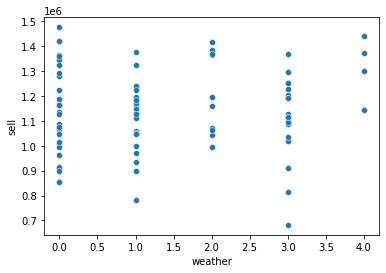

In [15]:
# 날씨에 따른 커피 소비 인구 (0: 맑음, 1: 구름 조금, 2: 구름 많음, 3: 비, 4: 흐림)
a=df_all[['date','weather','sell']].groupby(['date']).agg({'weather':'mean','sell':'sum'})
sns.scatterplot(x='weather', y='sell', data=a)

In [16]:
# 1도씩으로 묶기
da=df_all.copy()
da['avg_tem']=da['avg_tem'].round(0)
da['high_tem']=da['high_tem'].round(0)
da['low_tem']=da['low_tem'].round(0)
da['range']=da['range'].round(0)

In [17]:
# 나이와 소비량 상관관계
aa=df_all[['age','sell']][df_all['age']>=20].groupby('age').sum().reset_index()
aa.corr()

,age,sell
age,1.000000,-0.937371
sell,-0.937371,1.000000


,avg_tem,sell
avg_tem,1.000000,0.833693
sell,0.833693,1.000000


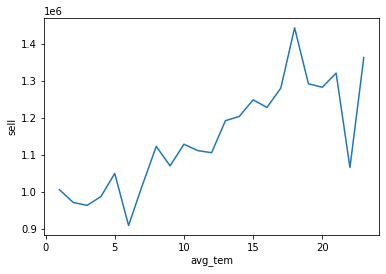

In [ ]:
# 전체 데이터
a=da[['date','avg_tem','sell']].groupby(['date']).agg({'avg_tem':'mean','sell':'sum'})
b=a.reset_index().groupby(['avg_tem']).mean().reset_index()
sns.lineplot(x='avg_tem', y='sell', data=b)
b.corr()
# b.to_csv('./data.csv',header=True)

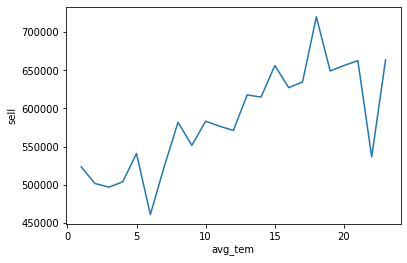

In [ ]:
# 여성 데이터
a=da[da['sex']=='F'][['date','avg_tem','sell']].groupby(['date']).agg({'avg_tem':'mean','sell':'sum'})
b=a.reset_index().groupby(['avg_tem']).mean().reset_index()
b['sex']='F'
sns.lineplot(x='avg_tem', y='sell', data=b)
# b.to_csv('./data_f.csv',header=True)

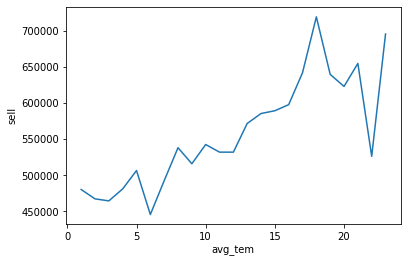

In [ ]:
# 남성 데이터
a=da[da['sex']=='M'][['date','avg_tem','sell']].groupby(['date']).agg({'avg_tem':'mean','sell':'sum'})
b=a.reset_index().groupby(['avg_tem']).mean().reset_index()
b['sex']='M'
sns.lineplot(x='avg_tem', y='sell', data=b)
# b.to_csv('./data_m.csv',header=True)

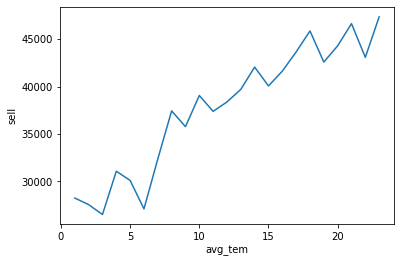

In [ ]:
# 미성년자 데이터
a=da[(da['age']=='00')|(da['age']=='15')][['date','avg_tem','sell']].groupby(['date']).agg({'avg_tem':'mean','sell':'sum'})
b=a.reset_index().groupby(['avg_tem']).mean().reset_index()
b['age']='10'
sns.lineplot(x='avg_tem', y='sell', data=b)
# b.to_csv('./data10.csv',header=True)

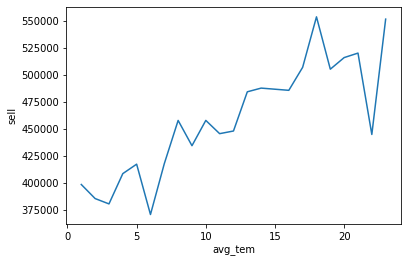

In [ ]:
# 20대 데이터
a=da[(da['age']=='20')|(da['age']=='25')][['date','avg_tem','sell']].groupby(['date']).agg({'avg_tem':'mean','sell':'sum'})
b=a.reset_index().groupby(['avg_tem']).mean().reset_index()
b['age']='20'
sns.lineplot(x='avg_tem', y='sell', data=b)
# b.to_csv('./data20.csv',header=True)

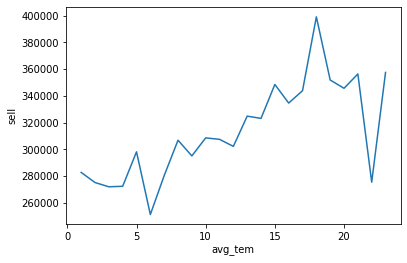

In [ ]:
# 30대 데이터
a=da[(da['age']=='30')|(da['age']=='35')][['date','avg_tem','sell']].groupby(['date']).agg({'avg_tem':'mean','sell':'sum'})
b=a.reset_index().groupby(['avg_tem']).mean().reset_index()
b['age']='30'
sns.lineplot(x='avg_tem', y='sell', data=b)
# b.to_csv('./data30.csv',header=True)

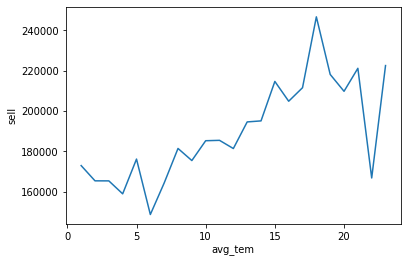

In [ ]:
# 40대 데이터
a=da[(da['age']=='40')|(da['age']=='45')][['date','avg_tem','sell']].groupby(['date']).agg({'avg_tem':'mean','sell':'sum'})
b=a.reset_index().groupby(['avg_tem']).mean().reset_index()
b['age']='40'
sns.lineplot(x='avg_tem', y='sell', data=b)
# b.to_csv('./data40.csv',header=True)

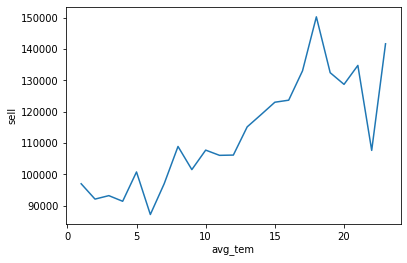

In [ ]:
# 50대 데이터
a=da[(da['age']=='50')|(da['age']=='55')][['date','avg_tem','sell']].groupby(['date']).agg({'avg_tem':'mean','sell':'sum'})
b=a.reset_index().groupby(['avg_tem']).mean().reset_index()
b['age']='50'
sns.lineplot(x='avg_tem', y='sell', data=b)
b.to_csv('./data50.csv',header=True)

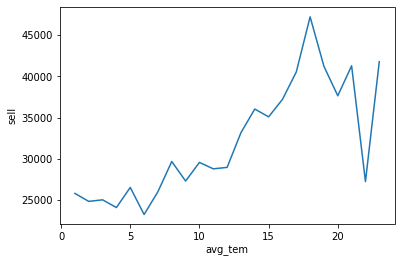

In [ ]:
# 60대 이상 데이터
a=da[(da['age']=='60')|(da['age']=='65')|(da['age']=='70')][['date','avg_tem','sell']].groupby(['date']).agg({'avg_tem':'mean','sell':'sum'})
b=a.reset_index().groupby(['avg_tem']).mean().reset_index()
b['age']='60'
sns.lineplot(x='avg_tem', y='sell', data=b)
b.to_csv('./data60.csv',header=True)